## 데이터 LOAD

In [1]:
## Json 문제가 나왔을때 읽는법 
import json 
with open('group.json','r') as f:
    data = json.load(f)

dic = { 'total' : len(data)}

with open('경로','w') as f:
    json.dump(dic,f)
    



FileNotFoundError: [Errno 2] No such file or directory: 'group.json'

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

train = pd.read_csv('./Data/예측 data/train.csv',encoding='cp949')
test = pd.read_csv('./Data/예측 data/test.csv',encoding='cp949')

In [157]:
train.shape , test.shape

((10886, 12), (6493, 9))

In [159]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [163]:
train['tempDate'] = train['datetime'].apply(lambda x : x.split())

In [100]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 데이터 전처리


### 결측값 

In [101]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [102]:
# train = train[~train['tempDate'].isnull()] # 만약 tempDate가 결측값이 있다면 처리
# train.dropna(axis=0) # 모든 행 결측치 처리 

### 변수 생성

In [103]:
train['tempDate'] = train['datetime'].apply(lambda x : x.split()) # 분리
train['tempDate'] 

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [113]:
# split으로 변수 생성  
train['Year'] = train['tempDate'].apply(lambda x:x[0].split('-')[0])
train['Month'] = train['tempDate'].apply(lambda x:x[0].split('-')[1])
train['Day'] = train['tempDate'].apply(lambda x:x[0].split('-')[2])
train['Hour'] = train['tempDate'].apply(lambda x:x[1].split(':')[0])

test['Year'] = train['tempDate'].apply(lambda x:x[0].split('-')[0])
test['Month'] = train['tempDate'].apply(lambda x:x[0].split('-')[1])
test['Day'] = train['tempDate'].apply(lambda x:x[0].split('-')[2])
test['Hour'] = train['tempDate'].apply(lambda x:x[1].split(':')[0])

In [155]:
# 숫자형으로 변경
train['Year'] = train['Year'].astype(int)
train['Month'] = train['Month'].astype(int)
train['Day'] = train['Day'].astype(int)
train['Hour'] = train['Day'].astype(int)

test['Year'] = train['Year'].astype(int)
test['Month'] = train['Month'].astype(int)
test['Day'] = train['Day'].astype(int)
test['Hour'] = train['Day'].astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  Year        10886 non-null  int32  
 12  Month       10886 non-null  int32  
 13  Day         10886 non-null  int32  
 14  Hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


In [119]:
def new_month(Month):
    if Month in [12,1,2]:
        return 4
    elif Month in [3,4,5]:
        return 1
    elif Month in [6,7,8]:
        return 2
    elif Month in [9,10,11]:
        return 3

train['season'] = train['Month'].apply(new_month)
test['season'] = test['Month'].apply(new_month)

In [120]:
train.drop('tempDate',axis=1,inplace=True)
test.drop('tempDate',axis=1,inplace=True)
# train.drop(columns=['a','b'],axis=1) # 컬럼 여러개일때 

### 시각화

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Year        10886 non-null  int32  
 13  Month       10886 non-null  int32  
 14  Day         10886 non-null  int32  
 15  Hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8), object(1)
memory usage: 1.2+ MB


In [122]:
num_var = train.select_dtypes(exclude=[object])
num_var.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

### 범주형 시각화

<Axes: xlabel='Year'>

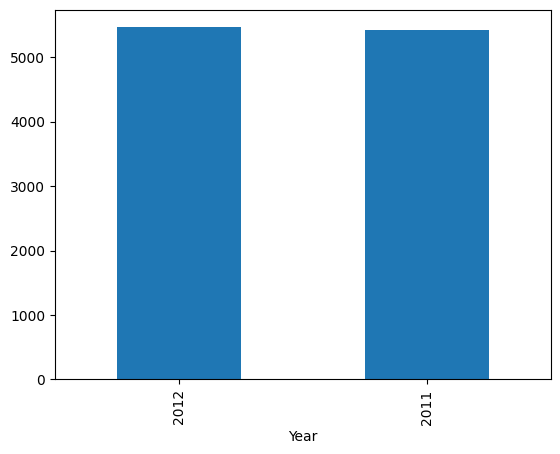

In [123]:
# Year 카테고리에 따라 예측값 count 보고 싶을때 #
# sns.barplot(x='Year',y='count',data=train.groupby('Year')['count'].mean().reset_index())
# sns.barplot(x='Year',y='count',data=train) # 예측값 count개수 와 관련 

# 단순히 범주별 개수가 몇개인지 보고싶을떄
train['Year'].value_counts().plot(kind='bar')

<Axes: xlabel='season', ylabel='count'>

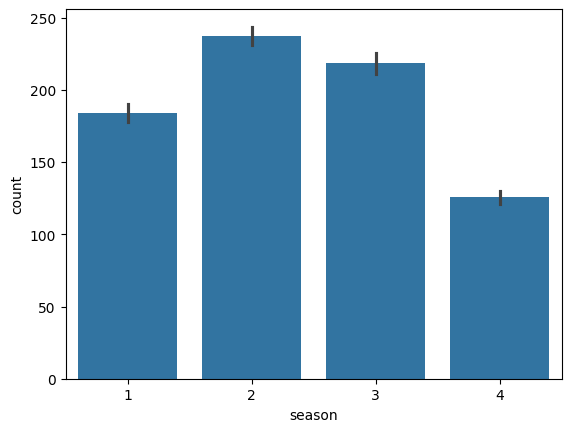

In [124]:
# 각 카테고리에 따라 예측값 count 보고싶을떄
# sns.barplot(x='holiday',y='count',data=train)
# sns.barplot(x='weather',y='count',data=train)
# sns.barplot(x='workingday',y='count',data=train)
sns.barplot(x='season',y='count',data=train)

### 연속형 시각화

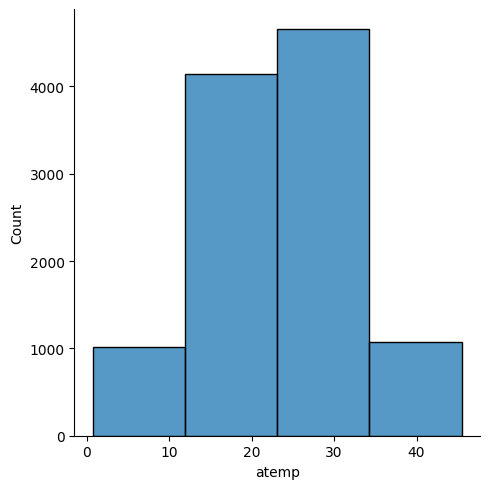

In [125]:
# sns.histplot(x='temp',data=train)
sns.displot(x='atemp',data=train,binwidth=10) # 폭을 주고싶을때 

### 상관관계

In [132]:
train = train.drop('datetime',axis=1)

KeyError: "['datetime'] not found in axis"

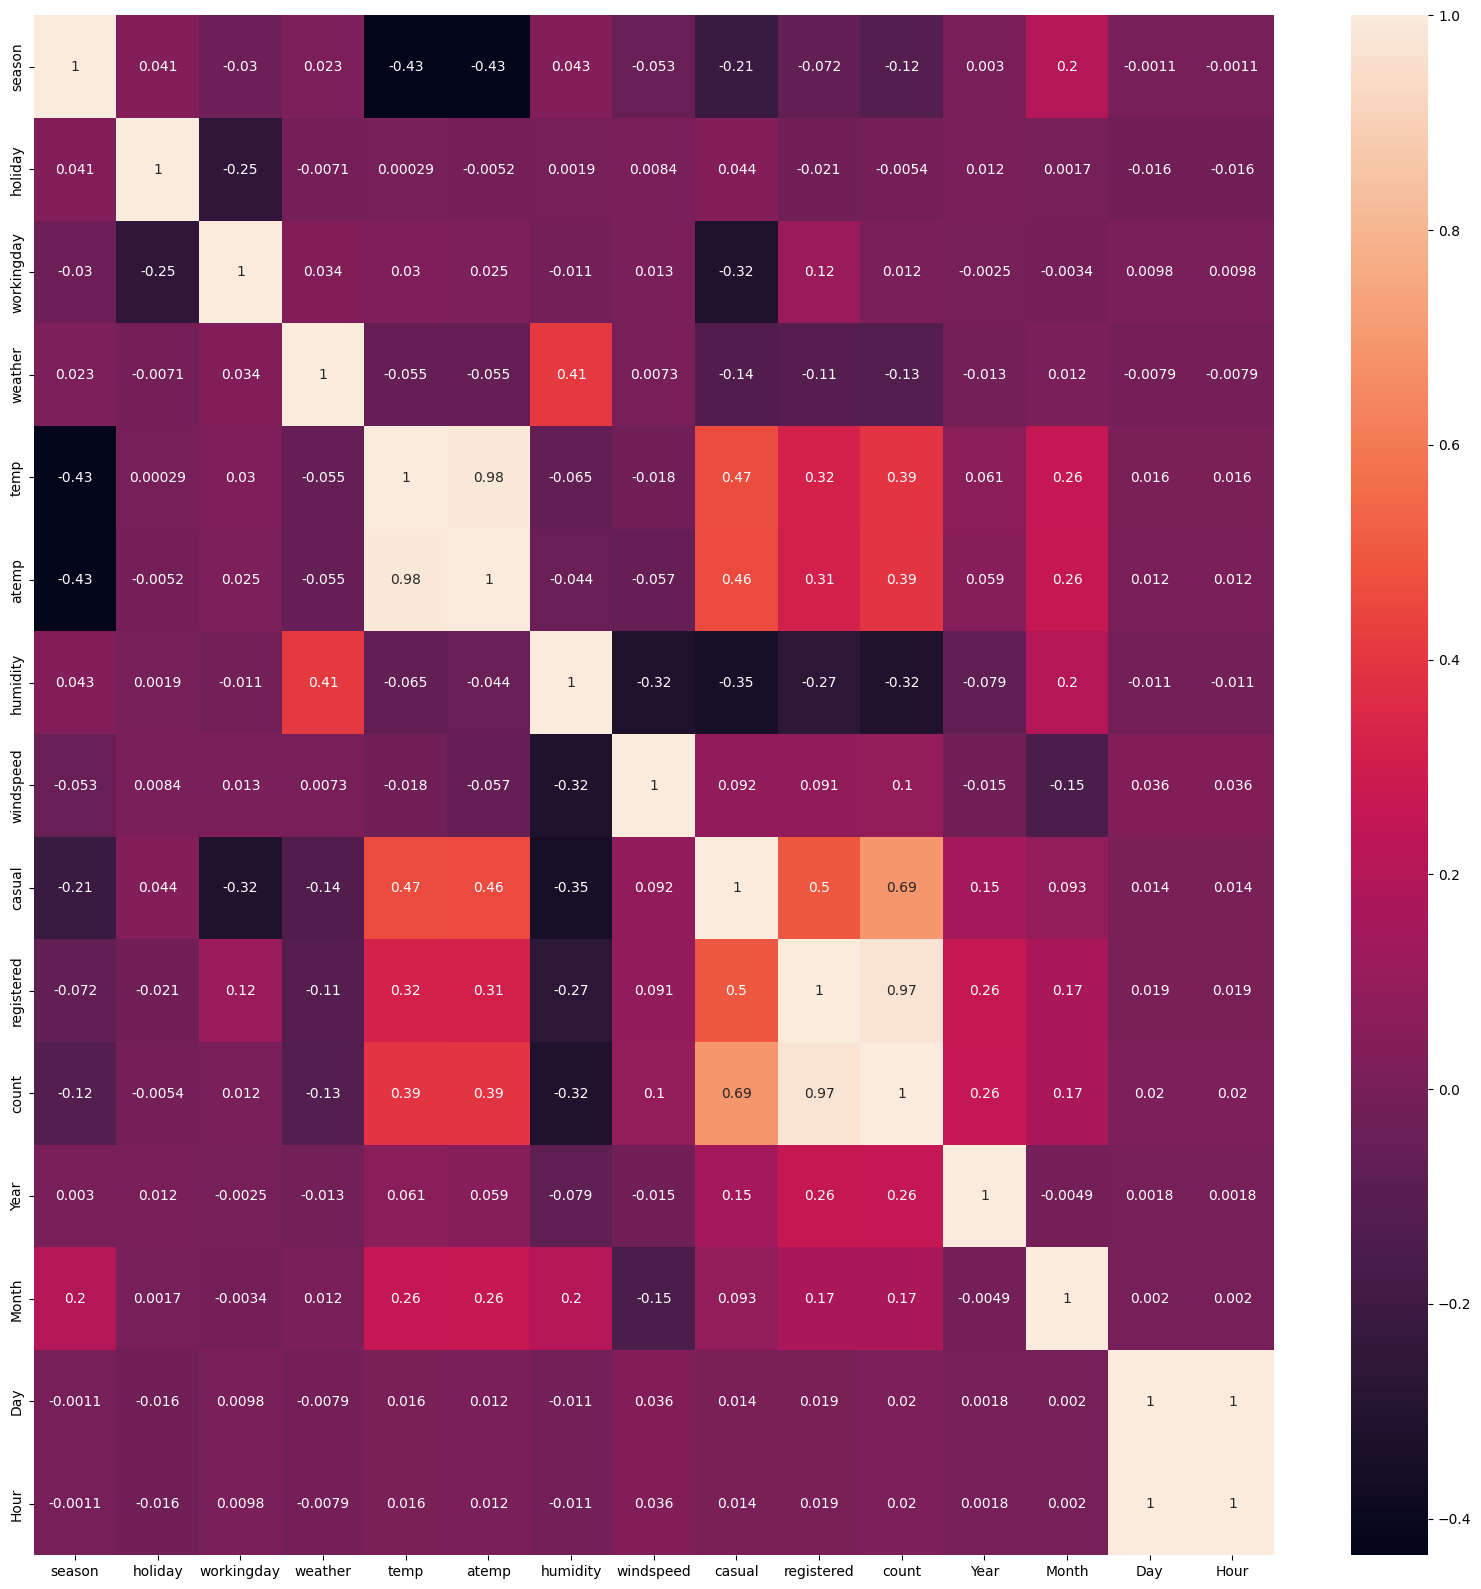

In [136]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='Hour', ylabel='count'>

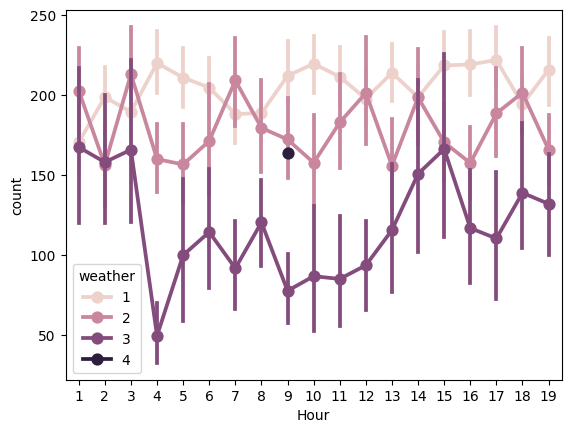

In [153]:
# 시간에 따른 count , 범주색
# sns.pointplot(x='Hour',y='count',hue='holiday',data=train)
sns.pointplot(x='Hour',y='count',hue='weather',data=train)

<Axes: xlabel='Month', ylabel='count'>

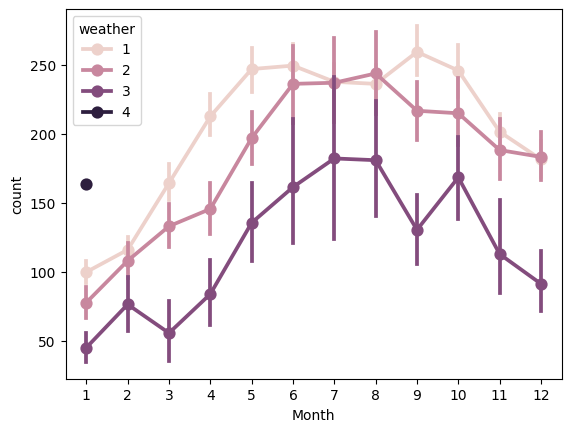

In [154]:
# 달에 따른 count , 범주색
sns.pointplot(x='Month',y='count',hue='weather',data=train)